In [1]:
import numpy as np 
import pandas as pd 

from subprocess import check_output
import time 
import matplotlib.pyplot as plt
from numpy import newaxis

In [2]:
prices_dataset =  pd.read_csv('../data/raw/prices.csv', header=0)
prices_dataset

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
5,2016-01-12 00:00:00,WLTW,115.510002,115.550003,114.500000,116.059998,1098000.0
6,2016-01-13 00:00:00,WLTW,116.459999,112.849998,112.589996,117.070000,949600.0
7,2016-01-14 00:00:00,WLTW,113.510002,114.379997,110.050003,115.029999,785300.0
8,2016-01-15 00:00:00,WLTW,113.330002,112.529999,111.919998,114.879997,1093700.0
9,2016-01-19 00:00:00,WLTW,113.660004,110.379997,109.870003,115.870003,1523500.0


In [18]:
symbol = 'YHOO'
yahoo = prices_dataset[prices_dataset['symbol']==symbol]
yahoo_stock_prices = yahoo.close.values.astype('float32')
yahoo_stock_prices = yahoo_stock_prices.reshape(1762, 1)
yahoo_stock_prices.shape

(1762, 1)

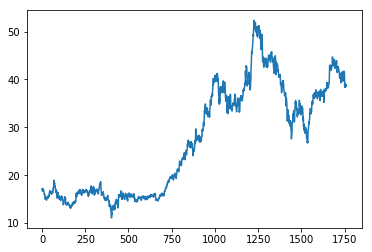

In [4]:
plt.plot(yahoo_stock_prices)
plt.show()

In [14]:
train_size = int(len(yahoo_stock_prices) * 0.80)
test_size = len(yahoo_stock_prices) - train_size
train, test = yahoo_stock_prices[0:train_size,:], yahoo_stock_prices[train_size:len(yahoo_stock_prices),:]
val_size = int(train_size * 0.20)
train_size = train_size - val_size
train, val = train[0:train_size,:], train[train_size:,:]
print(len(train), len(test), len(val))

1128 353 281


In [10]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols_train, names_train, cols_test, names_test = list(), list(), list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols_train.append(df.shift(i))
        names_train += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols_test.append(df.shift(-i))
        if i == 0:
            names_test += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names_test += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols_train +cols_test, axis=1)
    agg.columns = names_train + names_test
    if dropnan:
        agg.dropna(inplace=True)
    X = agg[agg.columns[:n_in*data.shape[1]]]
    y = agg[agg.columns[n_in*data.shape[1]:]]
    
    # drop rows with NaN values
    
    return X, y

In [15]:
# reshape into X=t and Y=t+1
n_in=28
n_out=28
X_train, y_train = series_to_supervised(train, n_in, n_out)
X_test, y_test = series_to_supervised(test, n_in, n_out)
X_val, y_val = series_to_supervised(val, n_in, n_out)

In [16]:
X_train.shape

(1073, 28)

In [22]:
X_train.to_csv('../data/processed/X_train_{}.csv'.format(symbol), index=False)
X_val.to_csv('../data/processed/X_val_{}.csv'.format(symbol), index=False)
X_test.to_csv('../data/processed/X_test_{}.csv'.format(symbol), index=False)
y_train.to_csv('../data/processed/y_train_{}.csv'.format(symbol), index=False)
y_val.to_csv('../data/processed/y_val_{}.csv'.format(symbol), index=False)
y_test.to_csv('../data/processed/y_test_{}.csv'.format(symbol), index=False)
#print(X_train.shape, y_train.shape, X_eval.shape, y_eval.shape)